<a href="https://colab.research.google.com/github/anmolbadhan13/tomato_prediction/blob/main/tomato_disease_classification_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=60


In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
   '/content/drive/MyDrive/PlantVillage1' ,
   shuffle=True,
   image_size=(IMAGE_SIZE,IMAGE_SIZE),
   batch_size=BATCH_SIZE

)

Found 4500 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

(32, 256, 256, 3)
[2 1 1 1 0 2 2 1 2 1 0 1 2 1 1 1 2 2 0 0 2 2 2 2 2 0 2 1 0 0 2 2]


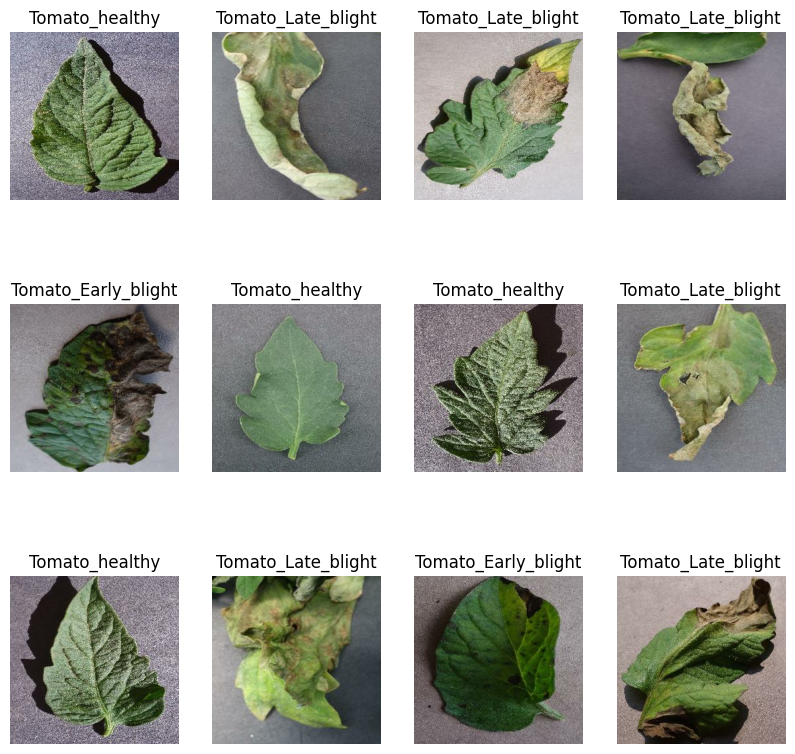

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[i]])
    plt.axis('off')


In [ ]:
# 80% ==>train
#20% test ==>10% val
            #10% test

In [ ]:
train_size=0.8
len(dataset)*train_size

112.80000000000001

In [ ]:
train_dataset=dataset.take(112)
len(train_dataset)

112

In [ ]:
test_dataset=dataset.skip(112)
len(test_dataset)

29

In [ ]:
val_size=0.1
len(dataset)*val_size

14.100000000000001

In [ ]:
val_ds=test_dataset.take(14)
len(val_ds)

14

In [ ]:
test_ds=test_dataset.skip(14)
len(test_ds)

15

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  assert(train_split+test_split+val_split) ==1

  ds_size=len(ds)
  if shuffle:
      ds=ds.shuffle(shuffle_size,seed=12)

  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)

  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)


  return train_ds, val_ds, test_ds

In [ ]:
train_ds,val_ds,test_ds =get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

112

In [ ]:
len(val_ds)

14

In [ ]:
len(test_ds)

15

In [ ]:
112*32

3584

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
     layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
# data augmentation
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(0.2),

])


In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    # flatten
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),



])
model.build(input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 32)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,

)

Epoch 1/60
112/112 [==============================] - 6s 50ms/step - loss: 0.0970 - accuracy: 0.9650 - val_loss: 0.1234 - val_accuracy: 0.9509
Epoch 2/60
112/112 [==============================] - 5s 49ms/step - loss: 0.0757 - accuracy: 0.9734 - val_loss: 0.0819 - val_accuracy: 0.9710
Epoch 3/60
112/112 [==============================] - 6s 51ms/step - loss: 0.0929 - accuracy: 0.9664 - val_loss: 0.1776 - val_accuracy: 0.9330
Epoch 4/60
112/112 [==============================] - 5s 48ms/step - loss: 0.1082 - accuracy: 0.9630 - val_loss: 0.1185 - val_accuracy: 0.9665
Epoch 5/60
112/112 [==============================] - 6s 51ms/step - loss: 0.0873 - accuracy: 0.9714 - val_loss: 0.0979 - val_accuracy: 0.9710
Epoch 6/60
112/112 [==============================] - 5s 48ms/step - loss: 0.0824 - accuracy: 0.9706 - val_loss: 0.2416 - val_accuracy: 0.9241
Epoch 7/60
112/112 [==============================] - 6s 50ms/step - loss: 0.0809 - accuracy: 0.9686 - val_loss: 0.1632 - val_accuracy: 0.9241

In [ ]:
scores=model.evaluate(test_ds)

15/15 [==============================] - 0s 21ms/step - loss: 0.1067 - accuracy: 0.9583


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.9650055766105652,
 0.9734042286872864,
 0.9664053916931152,
 0.9630458950996399,
 0.9714445471763611,
 0.9706047177314758,
 0.9686450362205505,
 0.9680851101875305,
 0.9633258581161499,
 0.9641657471656799,
 0.9714445471763611,
 0.9675251841545105,
 0.9720044732093811,
 0.9706047177314758,
 0.9725643992424011,
 0.958286702632904,
 0.9680851101875305,
 0.9619261026382446,
 0.9647256731987,
 0.9750840067863464,
 0.9764837622642517,
 0.9708846807479858,
 0.9678051471710205,
 0.9753639698028564,
 0.9742441177368164,
 0.9675251841545105,
 0.9714445471763611,
 0.9694848656654358,
 0.978723406791687,
 0.9767637252807617,
 0.9848824143409729,
 0.9728443622589111,
 0.9764837622642517,
 0.979003369808197,
 0.9756438732147217,
 0.979563295841217,
 0.979563295841217,
 0.9759238362312317,
 0.9804031252861023,
 0.978443443775177,
 0.9669652581214905,
 0.9812430143356323,
 0.9717245101928711,
 0.9834826588630676,
 0.977883517742157,
 0.9832026958465576,
 0.9798431992530823,
 0.977603554725647,
 0.

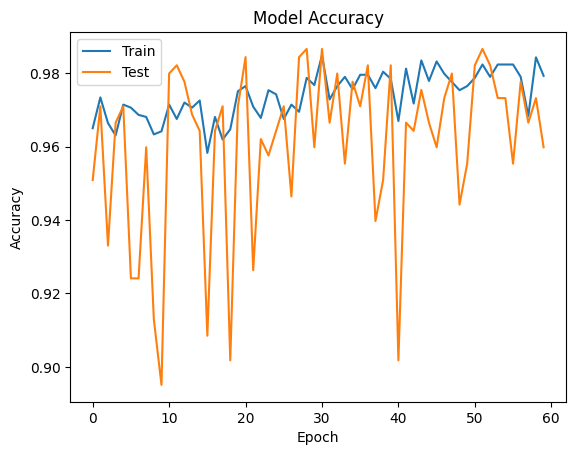

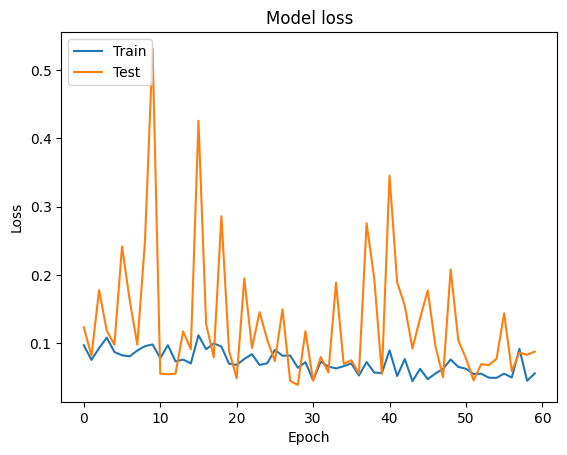

In [ ]:
## plot training and validation accuracy values
## plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc="upper left")
plt.show()

## plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc="upper left")
plt.show()

First image to predict
 Actual label: Tomato_healthy
1/1 [==============================] - 0s 29ms/step
Predicted Label: Tomato_healthy


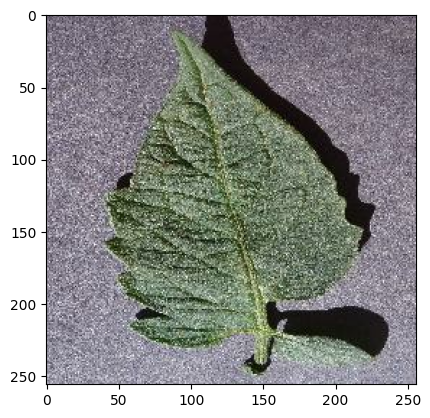

In [ ]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
   first_image=images_batch[0].numpy().astype('uint8')
   print('First image to predict')
   print(' Actual label:',class_names[labels_batch[0].numpy()])
   plt.imshow(first_image)

   batch_prediction=model.predict(images_batch)
   print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])


In [ ]:
model.save('tomato_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0) ## create a batch

  predictions=model.predict(img_array)

  predicted_class=class_names[np.argmax(predictions[0])]

  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 [==============================] - 0s 25ms/step


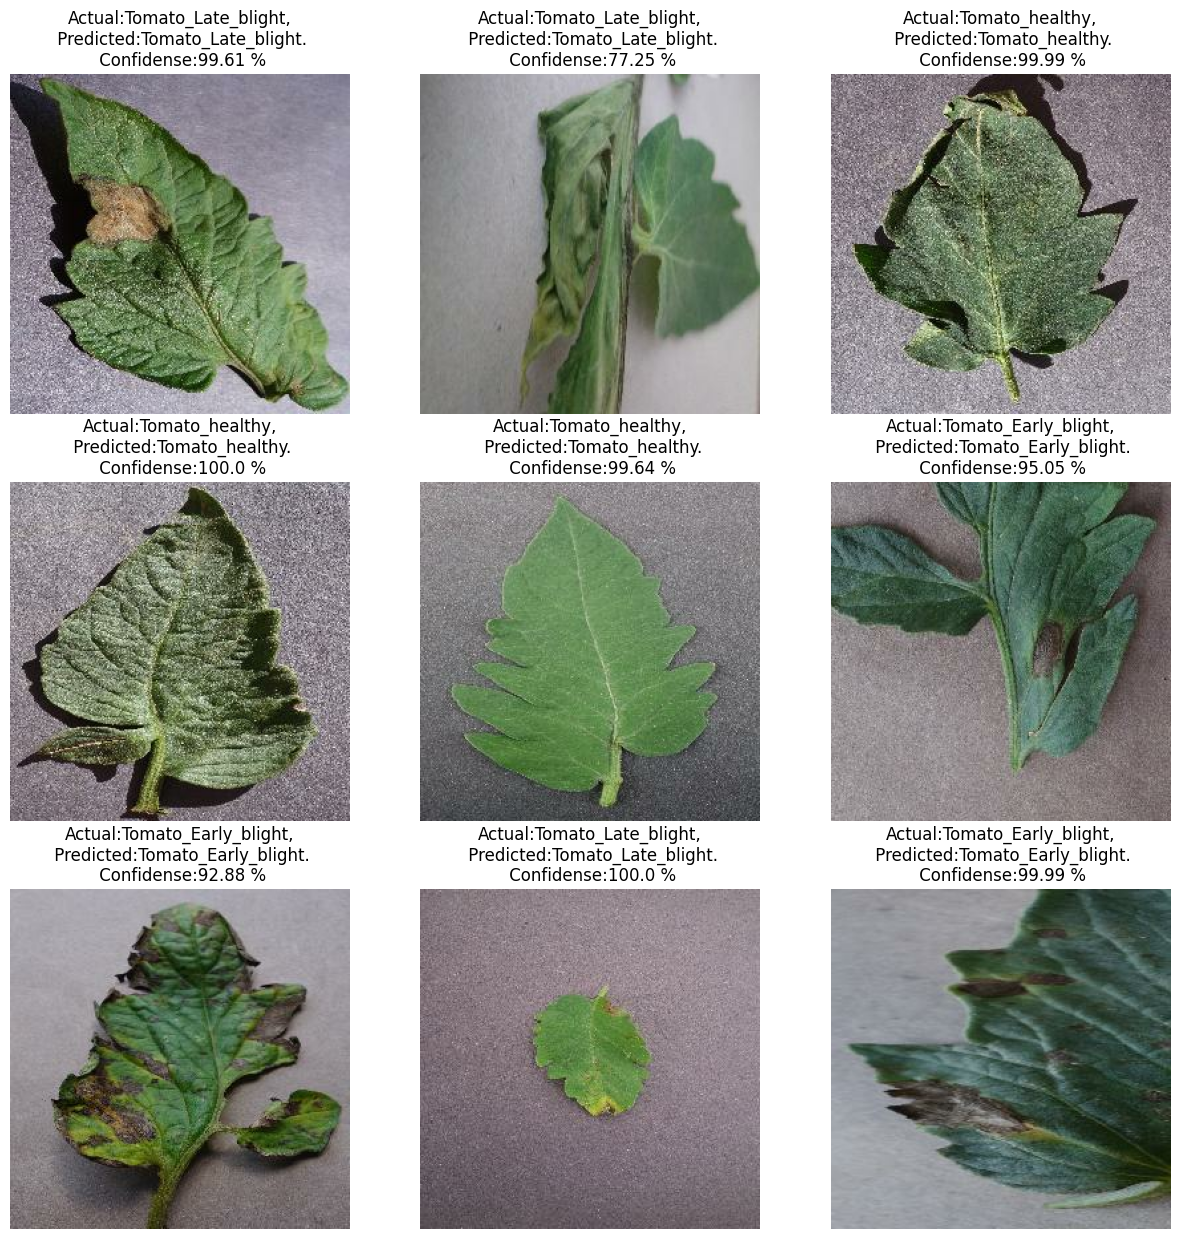

In [ ]:
plt.figure(figsize=(15,15))
for images ,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    predicted_class,confidense=predict(model,images[i].numpy())

    actual_class=class_names[labels[i]]
    plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidense:{confidense} %")
    plt.axis('off')